# Deep Learning 2021
## Assignment 6 - Optimization

### 1. Learning Rates
![lr.png](https://dl2021luh.s3.eu-central-1.amazonaws.com/assignment_06_Optimization_lr.png)

1. Label the curves with the following options and explain your choices:
    1. High learning rate 
    2. Low learning rate 
    3. Good learning rate
    4. Very high learning rate
  
2. Which of the above options is more likely to cause (i) exploding gradients (ii) vanishing gradients and why?
3. Assume a unified learning rate is used in all parameter dimensions. What happens when gradient in one direction is much larger than in the other?

### Solution
1. The red curve is labled as high learning rate, because loss descent rapidly.
   The blue curve is labled as low learning rate, because loss descent slowly.
   The green curve is labled as good learning rate, because loss descent rapidly first and converge fast.
   The yellow curve is labled as very high learning rate, because the training process passes over the best parameters and goes towards another direction.
2. Very high learning rate will cause exploding gradients, and low learning rate will cause vanishing gradients.

### 2. Miscellaneous
1. What are the advantages of using minibatch gradient descent over full-batch gradient descent (simply called gradient descent)?
2. Which of the following statements are true? Explain your answers.
    1. The main goal of applying batch normalization is to achieve regularization.
    2. Batch normalizations only allows the the use of smaller learning rates.
    3. Normalizing the mean and standard deviation of a unit can reduce the expressive power of the neural network containing that unit.  
    4. Batch normalization normalizes the distribution of inputs to each layer, making it possible to use saturating non-linearities like sigmoid.  
3. What are the drawbacks of sigmoid activation?
4. How can ReLU help in reducing the possibility of vanishing gradients? What are the other advantages of using ReLU activation?

### Solution

1. Computation time per update does not depend on number of training
examples, this allows convergence on extremely large datasets.
2. 
3. Its disadvantages are that it requires exponentiation and high computational cost.
4. Because ReLU will make sure that output of a layer not negative.The other advantage is it only require linear computation.


### C1. Effect of Momentum
Momentum can accelerate the training when the loss surface is too flat. Another effect of momentum is avoiding the optimization algorithm from being trapped in a local minimum and help to find the global minimum. Assume our loss function to be
\begin{equation}
    \mathcal{L}(\theta)=
    \begin{cases}
        \theta \cdot cos(\pi \theta) & \text{if } −1.0\leq \theta\leq 2.0 \\
        1e10 & \text{else}
    \end{cases}
\end{equation}
where $\theta$ is the parameter to solve. Using pytorch's `torch.optim.SGD`, find a minimum with initial values of $\theta = -0.95$ and learning rate $\alpha = 0.01$. Does your algorithm get stuck at a local minimum? Use Momentum (by setting the momentum argument) to solve this problem.

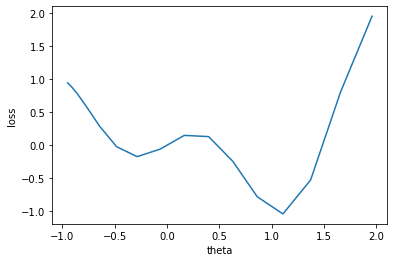

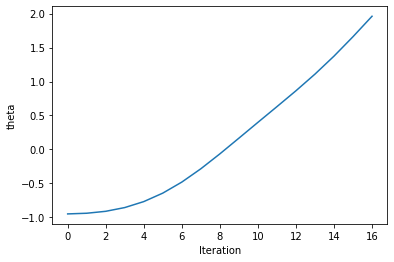

In [13]:
import torch
import matplotlib.pyplot as plt
import math
from math import pi

class simple_net(torch.nn.Module):
    def __init__(self):
        super(simple_net, self).__init__()


        self.linear = torch.nn.Linear(1, 1, bias=False)
        self.linear.weight = torch.nn.Parameter(torch.tensor([-0.95]), requires_grad=True)

    def forward(self, x):
        y = self.linear(x)
        return y


class My_loss(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, theta):
        if -1.0 <= theta <= 2.0:
            loss = theta * math.cos(pi * theta)
        else:
            loss = torch.tensor([1e10], requires_grad=True)
        return loss



net = simple_net()
loss_function = My_loss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

loss_log = []
theta_log = []


x = torch.tensor([1.])
for epoch in range(1000):
    y = net(x)
    loss = loss_function(y)
    loss.backward()
    
    loss_log.append(loss)
    theta_log.append(y)
    optimizer.step()

plt.plot(theta_log[:17], loss_log[:17])
plt.xlabel("theta")
plt.ylabel("loss")
plt.show()

plt.plot(theta_log[:17])
plt.xlabel("Iteration")
plt.ylabel("theta")
plt.show()

No, it doesn't get stuck at a local minimum.

### C2. Effect of Optimization Techniques on Training Time and Performance
In this task we revisit the CNN from assignment 4.C2, that you built to classify images into the 10 classes of the CIFAR-10 dataset. Starting from the solution (you can also start from your own solution),

1. Re-train the model for a maximum of 10 epochs with SGD without momentum, SGD with momentum (set to 0.9), AdaGrad and ADAM individually. Use a learning rate of 1e-3. Make sure to fix the random seed before creating the model in each training run for a better comparison. To set the random seed, use `torch.manual_seed(0)` before intializing each model. For each epoch, print: The average train loss, the average validation loss, the validation accuracy. How do the optimizers compare in terms of convergence speed and resulting validation performance?
2. Repeat the experiment from 1., but add batch normalization after every conv layer (after the ReLU activation). What effect does adding Batchnormalization have?

Same data loading as in assignment 4.C2:

Files already downloaded and verified
Files already downloaded and verified
classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
number of instances:
	train: 100
	val: 100
image of shape: torch.Size([3, 32, 32])
label: frog


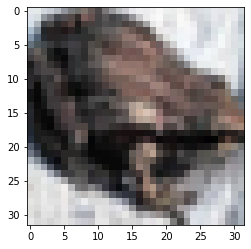

image of shape: torch.Size([3, 32, 32])
label: automobile


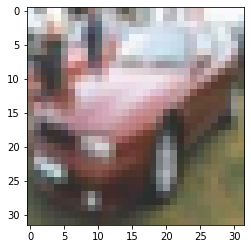

image of shape: torch.Size([3, 32, 32])
label: airplane


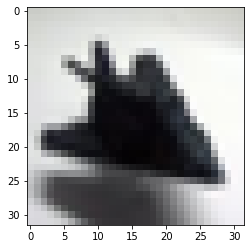

image of shape: torch.Size([3, 32, 32])
label: cat


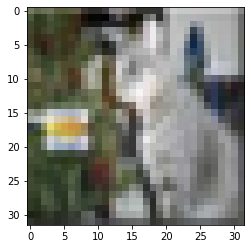

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

use_subset = False # Set this to True for debugging purposes.

transform = transforms.ToTensor()

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
classes = train_dataset.classes

if use_subset:
    train_dataset = torch.utils.data.Subset(train_dataset, torch.arange(0, 100))
    val_dataset = torch.utils.data.Subset(val_dataset, torch.arange(0, 100))

print(f'classes: {classes}\nnumber of instances:\n\ttrain: {len(train_dataset)}\n\tval: {len(val_dataset)}')

def show_examples(n):
    for i in range(n):
        index = torch.randint(0, len(train_dataset), size=(1,)) # select a random example
        image, target = train_dataset[index]
        print(f'image of shape: {image.shape}')
        print(f'label: {classes[target]}')
        plt.imshow(image.permute(1,2,0).numpy())
        plt.show()

show_examples(4)

batch_size = 32
train_dl = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dl = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=2)

epoch 0: 


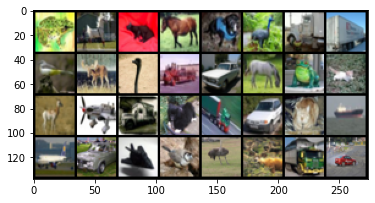

epoch 1: 


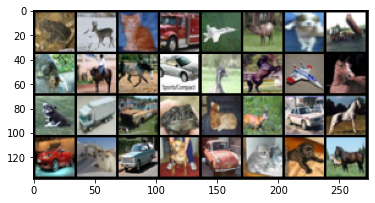

epoch 2: 


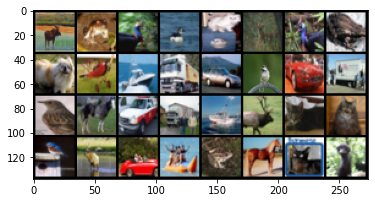

In [15]:
import numpy as np

for step ,(batch_x,batch_y) in enumerate(train_dl):
    if step < 3:
        imgs = torchvision.utils.make_grid(batch_x)
        imgs = np.transpose(imgs,(1,2,0))
        print("epoch %d: " % step)
        plt.imshow(imgs)
        plt.show()

In [16]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [17]:
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 48, kernel_size=3, padding=1),
            nn.ReLU()
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(48, 96, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(96, 192, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=8*8*192, out_features=64),
            nn.ReLU()
        )

        self.output = nn.Linear(in_features=64, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.fc(x)
        out = self.output(x)
        return out

In [18]:
#SGD without momentum
torch.manual_seed(0)
SGD_without = net()

optimizer = optim.SGD(SGD_without.parameters(), lr=1e-3, momentum=0)
loss_function = nn.CrossEntropyLoss()

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
SGD_without.to(device)

net(
  (conv1): Sequential(
    (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=12288, out_features=64, bias=True)
    (2): ReLU()
  )
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [20]:
SGD_without_train_loss = []
SGD_without_val_loss = []
SGD_without_val_accuracy = []
for epoch in range(10):
    print("training epoch %d: " % epoch)
    train_loss = 0
    val_loss = 0
    val_accuracy = 0
    for step, (batch_x, batch_y) in enumerate(train_dl):
        #train
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        output = SGD_without(batch_x)
        loss = loss_function(output, batch_y)
        train_loss = train_loss + loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss = train_loss / len(train_dl)
    SGD_without_train_loss.append(train_loss)
    print("train loss : %.4f" % train_loss)
    for step, (batch_x, batch_y) in enumerate(val_dl):
        #validation
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        output = SGD_without(batch_x)

        batch_len = batch_y.size()[0]
        y_predict = torch.zeros(batch_len)
        y_predict = y_predict.to(device)
        y_correct = 0
        for item in range(batch_len):
            y_predict[item] = torch.argmax(output[item])
            if y_predict[item] == batch_y[item]:
                y_correct = y_correct + 1
        
        val_accuracy = val_accuracy + y_correct / batch_len
        val_loss = val_loss + loss_function(output, batch_y)
        n = step
    val_loss = val_loss / len(val_dl)
    val_accuracy = val_accuracy / len(val_dl)
    SGD_without_val_loss.append(val_loss)
    SGD_without_val_accuracy.append(val_accuracy)
    print("validation loss : %.4f" % val_loss)
    print("validation accuracy : %.4f" % val_accuracy)

training epoch 0: 
train loss : 2.3029
validation loss : 2.2981
validation accuracy : 0.0781
training epoch 1: 
train loss : 2.3125
validation loss : 2.2983
validation accuracy : 0.0781
training epoch 2: 
train loss : 2.3048
validation loss : 2.2985
validation accuracy : 0.0781
training epoch 3: 
train loss : 2.3056
validation loss : 2.2986
validation accuracy : 0.0781
training epoch 4: 
train loss : 2.2978
validation loss : 2.2987
validation accuracy : 0.0781
training epoch 5: 
train loss : 2.2960
validation loss : 2.2987
validation accuracy : 0.0781
training epoch 6: 
train loss : 2.2882
validation loss : 2.2990
validation accuracy : 0.0781
training epoch 7: 
train loss : 2.3026
validation loss : 2.2991
validation accuracy : 0.0781
training epoch 8: 
train loss : 2.2990
validation loss : 2.2991
validation accuracy : 0.0781
training epoch 9: 
train loss : 2.3072
validation loss : 2.2991
validation accuracy : 0.0781


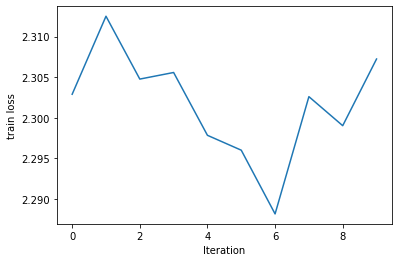

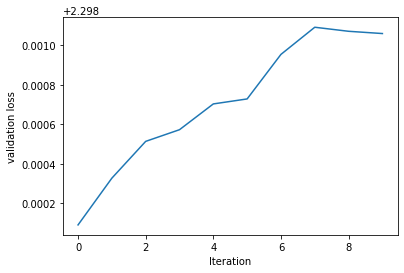

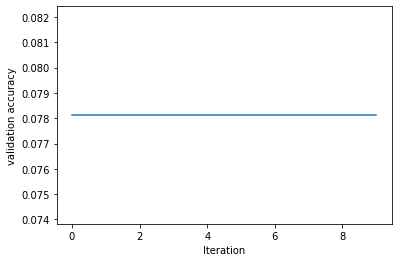

In [22]:
plt.plot(SGD_without_train_loss)
plt.xlabel("Iteration")
plt.ylabel("train loss")
plt.show()
plt.plot(SGD_without_val_loss)
plt.xlabel("Iteration")
plt.ylabel("validation loss")
plt.show()
plt.plot(SGD_without_val_accuracy)
plt.xlabel("Iteration")
plt.ylabel("validation accuracy")
plt.show()

In [23]:
#SGD with momentum
torch.manual_seed(0)
SGD_with = net()

optimizer = optim.SGD(SGD_with.parameters(), lr=1e-3, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
SGD_with.to(device)

net(
  (conv1): Sequential(
    (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=12288, out_features=64, bias=True)
    (2): ReLU()
  )
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [25]:
SGD_with_train_loss = []
SGD_with_val_loss = []
SGD_with_val_accuracy = []
for epoch in range(10):
    print("training epoch %d: " % epoch)
    train_loss = 0
    val_loss = 0
    val_accuracy = 0
    for step, (batch_x, batch_y) in enumerate(train_dl):
        #train
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        output = SGD_with(batch_x)
        loss = loss_function(output, batch_y)
        train_loss = train_loss + loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss = train_loss / len(train_dl)
    SGD_with_train_loss.append(train_loss)
    print("train loss : %.4f" % train_loss)
    for step, (batch_x, batch_y) in enumerate(val_dl):
        #validation
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        output = SGD_with(batch_x)

        batch_len = batch_y.size()[0]
        y_predict = torch.zeros(batch_len)
        y_predict = y_predict.to(device)
        y_correct = 0
        for item in range(batch_len):
            y_predict[item] = torch.argmax(output[item])
            if y_predict[item] == batch_y[item]:
                y_correct = y_correct + 1
        
        val_accuracy = val_accuracy + y_correct / batch_len
        val_loss = val_loss + loss_function(output, batch_y)
    val_loss = val_loss / len(val_dl)
    val_accuracy = val_accuracy / len(val_dl)
    SGD_with_val_loss.append(val_loss)
    SGD_with_val_accuracy.append(val_accuracy)
    print("validation loss : %.4f" % val_loss)
    print("validation accuracy : %.4f" % val_accuracy)

training epoch 0: 
train loss : 2.3029
validation loss : 2.2982
validation accuracy : 0.0781
training epoch 1: 
train loss : 2.3121
validation loss : 2.2989
validation accuracy : 0.0781
training epoch 2: 
train loss : 2.3032
validation loss : 2.2998
validation accuracy : 0.0781
training epoch 3: 
train loss : 2.3035
validation loss : 2.3006
validation accuracy : 0.0781
training epoch 4: 
train loss : 2.2955
validation loss : 2.3012
validation accuracy : 0.0781
training epoch 5: 
train loss : 2.2936
validation loss : 2.3017
validation accuracy : 0.0781
training epoch 6: 
train loss : 2.2831
validation loss : 2.3022
validation accuracy : 0.0781
training epoch 7: 
train loss : 2.2969
validation loss : 2.3032
validation accuracy : 0.0781
training epoch 8: 
train loss : 2.2934
validation loss : 2.3041
validation accuracy : 0.0781
training epoch 9: 
train loss : 2.3005
validation loss : 2.3047
validation accuracy : 0.0781


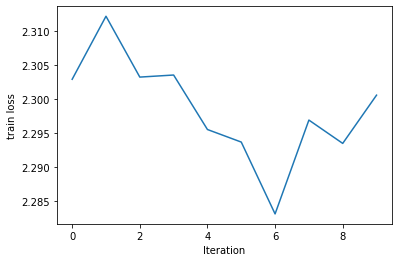

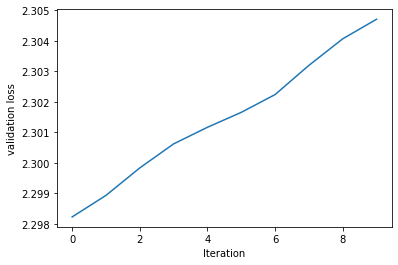

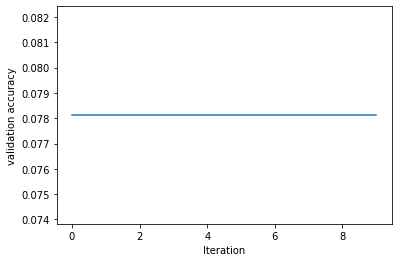

In [26]:
plt.plot(SGD_with_train_loss)
plt.xlabel("Iteration")
plt.ylabel("train loss")
plt.show()
plt.plot(SGD_with_val_loss)
plt.xlabel("Iteration")
plt.ylabel("validation loss")
plt.show()
plt.plot(SGD_with_val_accuracy)
plt.xlabel("Iteration")
plt.ylabel("validation accuracy")
plt.show()

In [27]:
#AdaGrad
torch.manual_seed(0)
AdaGrad = net()

optimizer = optim.Adagrad(AdaGrad.parameters(), lr=1e-3, lr_decay=0, weight_decay=0)
loss_function = nn.CrossEntropyLoss()

In [28]:
AdaGrad_train_loss = []
AdaGrad_val_loss = []
AdaGrad_val_accuracy = []
for epoch in range(10):
    print("training epoch %d: " % epoch)
    train_loss = 0
    val_loss = 0
    val_accuracy = 0
    for step, (batch_x, batch_y) in enumerate(train_dl):
        #train
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        #batch_x = batch_x.to(device)
        #batch_y = batch_y.to(device)
        
        output = AdaGrad(batch_x)
        loss = loss_function(output, batch_y)
        train_loss = train_loss + loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #n = step
    train_loss = train_loss / len(train_dl)
    AdaGrad_train_loss.append(train_loss)
    print("train loss : %.4f" % train_loss)
    for step, (batch_x, batch_y) in enumerate(val_dl):
        #validation
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        #batch_x = batch_x.to(device)
        #batch_y = batch_y.to(device)
        
        output = AdaGrad(batch_x)

        batch_len = batch_y.size()[0]
        y_predict = torch.zeros(batch_len)
        #y_predict = y_predict.to(device)
        y_correct = 0
        for item in range(batch_len):
            y_predict[item] = torch.argmax(output[item])
            if y_predict[item] == batch_y[item]:
                y_correct = y_correct + 1
        
        val_accuracy = val_accuracy + y_correct / batch_len
        val_loss = val_loss + loss_function(output, batch_y)
        #n = step
    val_loss = val_loss / len(val_dl)
    val_accuracy = val_accuracy / len(val_dl)
    AdaGrad_val_loss.append(val_loss)
    AdaGrad_val_accuracy.append(val_accuracy)
    print("validation loss : %.4f" % val_loss)
    print("validation accuracy : %.4f" % val_accuracy)

training epoch 0: 
train loss : 2.2836
validation loss : 2.5306
validation accuracy : 0.0469
training epoch 1: 
train loss : 2.2881
validation loss : 2.4379
validation accuracy : 0.0469
training epoch 2: 
train loss : 2.2542
validation loss : 2.4640
validation accuracy : 0.0469
training epoch 3: 
train loss : 2.2426
validation loss : 2.3825
validation accuracy : 0.0469
training epoch 4: 
train loss : 2.2501
validation loss : 2.3239
validation accuracy : 0.0703
training epoch 5: 
train loss : 2.2303
validation loss : 2.3129
validation accuracy : 0.0547
training epoch 6: 
train loss : 2.1673
validation loss : 2.5344
validation accuracy : 0.0469
training epoch 7: 
train loss : 2.1704
validation loss : 2.3811
validation accuracy : 0.0781
training epoch 8: 
train loss : 2.1606
validation loss : 2.3500
validation accuracy : 0.0938
training epoch 9: 
train loss : 2.1159
validation loss : 2.3115
validation accuracy : 0.0859


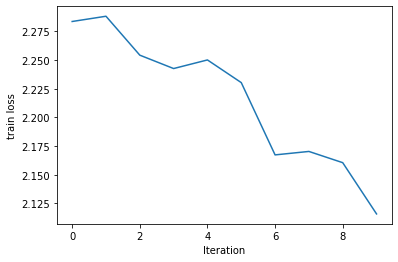

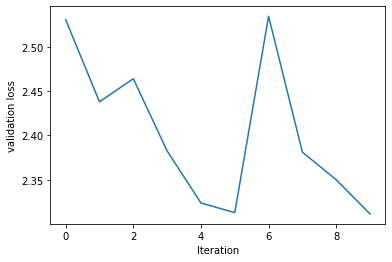

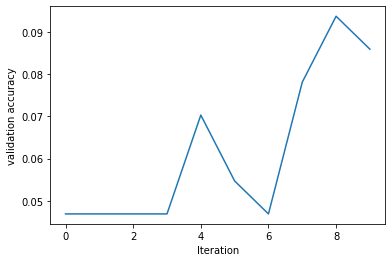

In [29]:
plt.plot(AdaGrad_train_loss)
plt.xlabel("Iteration")
plt.ylabel("train loss")
plt.show()
plt.plot(AdaGrad_val_loss)
plt.xlabel("Iteration")
plt.ylabel("validation loss")
plt.show()
plt.plot(AdaGrad_val_accuracy)
plt.xlabel("Iteration")
plt.ylabel("validation accuracy")
plt.show()

In [30]:
#Adam
torch.manual_seed(0)
Adam = net()

optimizer = optim.Adam(Adam.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
loss_function = nn.CrossEntropyLoss()

In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
Adam.to(device)

net(
  (conv1): Sequential(
    (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=12288, out_features=64, bias=True)
    (2): ReLU()
  )
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [32]:
Adam_train_loss = []
Adam_val_loss = []
Adam_val_accuracy = []
for epoch in range(10):
    print("training epoch %d: " % epoch)
    train_loss = 0
    val_loss = 0
    val_accuracy = 0
    for step, (batch_x, batch_y) in enumerate(train_dl):
        #train
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        output = Adam(batch_x)
        loss = loss_function(output, batch_y)
        train_loss = train_loss + loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #n = step
    train_loss = train_loss / len(train_dl)
    Adam_train_loss.append(train_loss)
    print("train loss : %.4f" % train_loss)
    for step, (batch_x, batch_y) in enumerate(val_dl):
        #validation
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        output = Adam(batch_x)

        batch_len = batch_y.size()[0]
        y_predict = torch.zeros(batch_len)
        y_predict = y_predict.to(device)
        y_correct = 0
        for item in range(batch_len):
            y_predict[item] = torch.argmax(output[item])
            if y_predict[item] == batch_y[item]:
                y_correct = y_correct + 1
        
        val_accuracy = val_accuracy + y_correct / batch_len
        val_loss = val_loss + loss_function(output, batch_y)
        #n = step
    val_loss = val_loss / len(val_dl)
    val_accuracy = val_accuracy / len(val_dl)
    Adam_val_loss.append(val_loss)
    Adam_val_accuracy.append(val_accuracy)
    print("validation loss : %.4f" % val_loss)
    print("validation accuracy : %.4f" % val_accuracy)

training epoch 0: 
train loss : 2.2897
validation loss : 2.4207
validation accuracy : 0.0469
training epoch 1: 
train loss : 2.2600
validation loss : 2.4640
validation accuracy : 0.0469
training epoch 2: 
train loss : 2.2208
validation loss : 2.5120
validation accuracy : 0.0469
training epoch 3: 
train loss : 2.2079
validation loss : 2.3826
validation accuracy : 0.0703
training epoch 4: 
train loss : 2.2201
validation loss : 2.3894
validation accuracy : 0.0703
training epoch 5: 
train loss : 2.0974
validation loss : 2.4390
validation accuracy : 0.0859
training epoch 6: 
train loss : 1.9463
validation loss : 2.8428
validation accuracy : 0.1094
training epoch 7: 
train loss : 1.9490
validation loss : 2.5454
validation accuracy : 0.0938
training epoch 8: 
train loss : 2.0110
validation loss : 2.5696
validation accuracy : 0.1406
training epoch 9: 
train loss : 1.7628
validation loss : 2.4980
validation accuracy : 0.1172


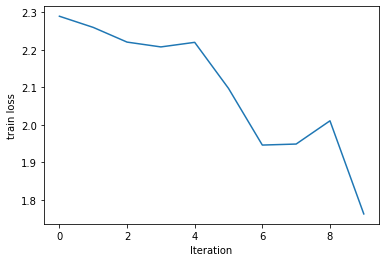

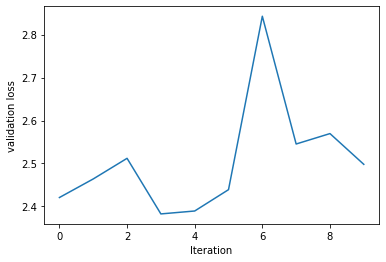

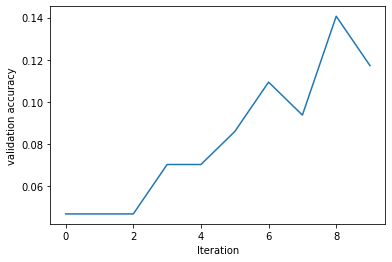

In [33]:
plt.plot(Adam_train_loss)
plt.xlabel("Iteration")
plt.ylabel("train loss")
plt.show()
plt.plot(Adam_val_loss)
plt.xlabel("Iteration")
plt.ylabel("validation loss")
plt.show()
plt.plot(Adam_val_accuracy)
plt.xlabel("Iteration")
plt.ylabel("validation accuracy")
plt.show()

In [34]:
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 48, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(48)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(48, 96, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(96),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(96, 192, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(192),
            nn.MaxPool2d(kernel_size=2)
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=8*8*192, out_features=64),
            nn.ReLU()
        )

        self.output = nn.Linear(in_features=64, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.fc(x)
        out = self.output(x)
        return out

In [35]:
#SGD without momentum
torch.manual_seed(0)
SGD_without = net()

optimizer = optim.SGD(SGD_without.parameters(), lr=1e-3, momentum=0)
loss_function = nn.CrossEntropyLoss()

In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
SGD_without.to(device)

net(
  (conv1): Sequential(
    (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=12288, out_features=64, bias=True)
    (2): ReLU()
  )
  (output): Linear(in_features=64, out_features=10, bias=Tru

In [37]:
SGD_without_train_loss = []
SGD_without_val_loss = []
SGD_without_val_accuracy = []
for epoch in range(10):
    print("training epoch %d: " % epoch)
    train_loss = 0
    val_loss = 0
    val_accuracy = 0
    for step, (batch_x, batch_y) in enumerate(train_dl):
        #train
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        output = SGD_without(batch_x)
        loss = loss_function(output, batch_y)
        train_loss = train_loss + loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #n = step
    train_loss = train_loss / len(train_dl)
    SGD_without_train_loss.append(train_loss)
    print("train loss : %.4f" % train_loss)
    for step, (batch_x, batch_y) in enumerate(val_dl):
        #validation
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        output = SGD_without(batch_x)

        batch_len = batch_y.size()[0]
        y_predict = torch.zeros(batch_len)
        y_predict = y_predict.to(device)
        y_correct = 0
        for item in range(batch_len):
            y_predict[item] = torch.argmax(output[item])
            if y_predict[item] == batch_y[item]:
                y_correct = y_correct + 1
        
        val_accuracy = val_accuracy + y_correct / batch_len
        val_loss = val_loss + loss_function(output, batch_y)
        #n = step
    val_loss = val_loss / len(val_dl)
    val_accuracy = val_accuracy / len(val_dl)
    SGD_without_val_loss.append(val_loss)
    SGD_without_val_accuracy.append(val_accuracy)
    print("validation loss : %.4f" % val_loss)
    print("validation accuracy : %.4f" % val_accuracy)

training epoch 0: 
train loss : 2.2351
validation loss : 2.2975
validation accuracy : 0.1094
training epoch 1: 
train loss : 2.1450
validation loss : 2.3189
validation accuracy : 0.0938
training epoch 2: 
train loss : 2.0447
validation loss : 2.3125
validation accuracy : 0.1016
training epoch 3: 
train loss : 1.8110
validation loss : 2.2960
validation accuracy : 0.0859
training epoch 4: 
train loss : 1.8226
validation loss : 2.3027
validation accuracy : 0.1250
training epoch 5: 
train loss : 1.6532
validation loss : 2.2949
validation accuracy : 0.1094
training epoch 6: 
train loss : 1.5767
validation loss : 2.3470
validation accuracy : 0.0859
training epoch 7: 
train loss : 1.4864
validation loss : 2.3276
validation accuracy : 0.1172
training epoch 8: 
train loss : 1.3683
validation loss : 2.3012
validation accuracy : 0.1719
training epoch 9: 
train loss : 1.2817
validation loss : 2.2967
validation accuracy : 0.1484


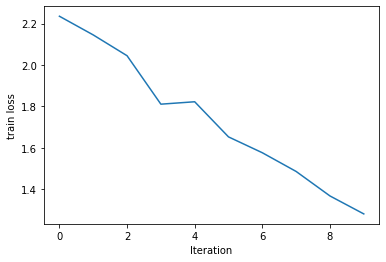

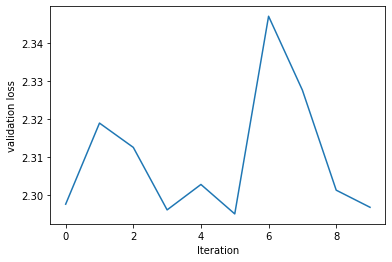

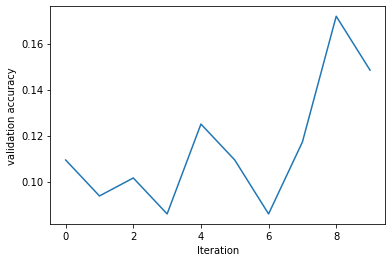

In [38]:
plt.plot(SGD_without_train_loss)
plt.xlabel("Iteration")
plt.ylabel("train loss")
plt.show()
plt.plot(SGD_without_val_loss)
plt.xlabel("Iteration")
plt.ylabel("validation loss")
plt.show()
plt.plot(SGD_without_val_accuracy)
plt.xlabel("Iteration")
plt.ylabel("validation accuracy")
plt.show()

In [39]:
#SGD with momentum
torch.manual_seed(0)
SGD_with = net()

optimizer = optim.SGD(SGD_with.parameters(), lr=1e-3, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

In [40]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
SGD_with.to(device)

net(
  (conv1): Sequential(
    (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=12288, out_features=64, bias=True)
    (2): ReLU()
  )
  (output): Linear(in_features=64, out_features=10, bias=Tru

In [41]:
SGD_with_train_loss = []
SGD_with_val_loss = []
SGD_with_val_accuracy = []
for epoch in range(10):
    print("training epoch %d: " % epoch)
    train_loss = 0
    val_loss = 0
    val_accuracy = 0
    for step, (batch_x, batch_y) in enumerate(train_dl):
        #train
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        output = SGD_with(batch_x)
        loss = loss_function(output, batch_y)
        train_loss = train_loss + loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #n = step
    train_loss = train_loss / len(train_dl)
    SGD_with_train_loss.append(train_loss)
    print("train loss : %.4f" % train_loss)
    for step, (batch_x, batch_y) in enumerate(val_dl):
        #validation
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        output = SGD_with(batch_x)

        batch_len = batch_y.size()[0]
        y_predict = torch.zeros(batch_len)
        y_predict = y_predict.to(device)
        y_correct = 0
        for item in range(batch_len):
            y_predict[item] = torch.argmax(output[item])
            if y_predict[item] == batch_y[item]:
                y_correct = y_correct + 1
        
        val_accuracy = val_accuracy + y_correct / batch_len
        val_loss = val_loss + loss_function(output, batch_y)
        n = step
    val_loss = val_loss / len(val_dl)
    val_accuracy = val_accuracy / len(val_dl)
    SGD_with_val_loss.append(val_loss)
    SGD_with_val_accuracy.append(val_accuracy)
    print("validation loss : %.4f" % val_loss)
    print("validation accuracy : %.4f" % val_accuracy)

training epoch 0: 
train loss : 2.2252
validation loss : 2.3194
validation accuracy : 0.1094
training epoch 1: 
train loss : 1.8678
validation loss : 2.4484
validation accuracy : 0.0859
training epoch 2: 
train loss : 1.3967
validation loss : 2.4801
validation accuracy : 0.1016
training epoch 3: 
train loss : 0.9502
validation loss : 2.4906
validation accuracy : 0.1641
training epoch 4: 
train loss : 0.8101
validation loss : 2.5178
validation accuracy : 0.1016
training epoch 5: 
train loss : 0.5145
validation loss : 2.7176
validation accuracy : 0.1406
training epoch 6: 
train loss : 0.3479
validation loss : 2.7569
validation accuracy : 0.1562
training epoch 7: 
train loss : 0.3102
validation loss : 2.7657
validation accuracy : 0.2188
training epoch 8: 
train loss : 0.2128
validation loss : 2.7956
validation accuracy : 0.2266
training epoch 9: 
train loss : 0.1641
validation loss : 2.7375
validation accuracy : 0.2969


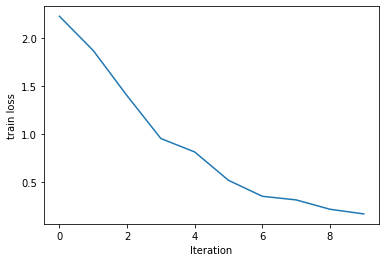

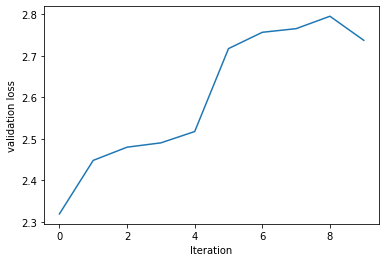

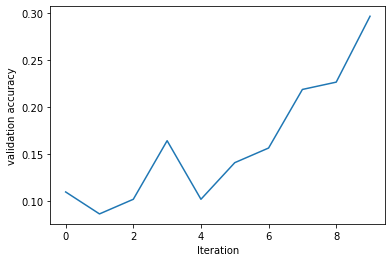

In [42]:
plt.plot(SGD_with_train_loss)
plt.xlabel("Iteration")
plt.ylabel("train loss")
plt.show()
plt.plot(SGD_with_val_loss)
plt.xlabel("Iteration")
plt.ylabel("validation loss")
plt.show()
plt.plot(SGD_with_val_accuracy)
plt.xlabel("Iteration")
plt.ylabel("validation accuracy")
plt.show()

In [43]:
#AdaGrad
torch.manual_seed(0)
AdaGrad = net()

optimizer = optim.Adagrad(AdaGrad.parameters(), lr=1e-3, lr_decay=0, weight_decay=0)
loss_function = nn.CrossEntropyLoss()

In [ ]:
AdaGrad_train_loss = []
AdaGrad_val_loss = []
AdaGrad_val_accuracy = []
for epoch in range(10):
    print("training epoch %d: " % epoch)
    train_loss = 0
    val_loss = 0
    val_accuracy = 0
    for step, (batch_x, batch_y) in enumerate(train_dl):
        #train
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        #batch_x = batch_x.to(device)
        #batch_y = batch_y.to(device)
        
        output = AdaGrad(batch_x)
        loss = loss_function(output, batch_y)
        train_loss = train_loss + loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #n = step
    train_loss = train_loss / len(train_dl)
    AdaGrad_train_loss.append(train_loss)
    print("train loss : %.4f" % train_loss)
    for step, (batch_x, batch_y) in enumerate(val_dl):
        #validation
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        #batch_x = batch_x.to(device)
        #batch_y = batch_y.to(device)
        
        output = AdaGrad(batch_x)

        batch_len = batch_y.size()[0]
        y_predict = torch.zeros(batch_len)
        #y_predict = y_predict.to(device)
        y_correct = 0
        for item in range(batch_len):
            y_predict[item] = torch.argmax(output[item])
            if y_predict[item] == batch_y[item]:
                y_correct = y_correct + 1
        
        val_accuracy = val_accuracy + y_correct / batch_len
        val_loss = val_loss + loss_function(output, batch_y)
        n = step
    val_loss = val_loss / len(val_dl)
    val_accuracy = val_accuracy / len(val_dl)
    AdaGrad_val_loss.append(val_loss)
    AdaGrad_val_accuracy.append(val_accuracy)
    print("validation loss : %.4f" % val_loss)
    print("validation accuracy : %.4f" % val_accuracy)

training epoch 0: 
train loss : 2.9470
validation loss : 2.6140
validation accuracy : 0.1719
training epoch 1: 
train loss : 1.0331
validation loss : 2.9437
validation accuracy : 0.1250
training epoch 2: 
train loss : 0.4647
validation loss : 2.6179
validation accuracy : 0.2188
training epoch 3: 
train loss : 0.1668
validation loss : 2.7529
validation accuracy : 0.1875
training epoch 4: 
train loss : 0.1458
validation loss : 2.9816
validation accuracy : 0.2188
training epoch 5: 
train loss : 0.1482
validation loss : 3.0185
validation accuracy : 0.2031
training epoch 6: 
train loss : 0.0841
validation loss : 2.9289
validation accuracy : 0.2031
training epoch 7: 
train loss : 0.0871
validation loss : 2.8923
validation accuracy : 0.2266
training epoch 8: 
train loss : 0.0647


In [ ]:
plt.plot(AdaGrad_train_loss)
plt.xlabel("Iteration")
plt.ylabel("train loss")
plt.show()
plt.plot(AdaGrad_val_loss)
plt.xlabel("Iteration")
plt.ylabel("validation loss")
plt.show()
plt.plot(AdaGrad_val_accuracy)
plt.xlabel("Iteration")
plt.ylabel("validation accuracy")
plt.show()

In [ ]:
#Adam
torch.manual_seed(0)
Adam = net()

optimizer = optim.Adam(Adam.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
loss_function = nn.CrossEntropyLoss()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
Adam.to(device)

In [ ]:
Adam_train_loss = []
Adam_val_loss = []
Adam_val_accuracy = []
for epoch in range(10):
    print("training epoch %d: " % epoch)
    train_loss = 0
    val_loss = 0
    val_accuracy = 0
    for step, (batch_x, batch_y) in enumerate(train_dl):
        #train
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        output = Adam(batch_x)
        loss = loss_function(output, batch_y)
        train_loss = train_loss + loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #n = step
    train_loss = train_loss / len(train_dl)
    Adam_train_loss.append(train_loss)
    print("train loss : %.4f" % train_loss)
    for step, (batch_x, batch_y) in enumerate(val_dl):
        #validation
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        output = Adam(batch_x)

        batch_len = batch_y.size()[0]
        y_predict = torch.zeros(batch_len)
        y_predict = y_predict.to(device)
        y_correct = 0
        for item in range(batch_len):
            y_predict[item] = torch.argmax(output[item])
            if y_predict[item] == batch_y[item]:
                y_correct = y_correct + 1
        
        val_accuracy = val_accuracy + y_correct / batch_len
        val_loss = val_loss + loss_function(output, batch_y)
        n = step
    val_loss = val_loss / len(val_dl)
    val_accuracy = val_accuracy / len(val_dl)
    Adam_val_loss.append(val_loss)
    Adam_val_accuracy.append(val_accuracy)
    print("validation loss : %.4f" % val_loss)
    print("validation accuracy : %.4f" % val_accuracy)

In [ ]:
plt.plot(Adam_train_loss)
plt.xlabel("Iteration")
plt.ylabel("train loss")
plt.show()
plt.plot(Adam_val_loss)
plt.xlabel("Iteration")
plt.ylabel("validation loss")
plt.show()
plt.plot(Adam_val_accuracy)
plt.xlabel("Iteration")
plt.ylabel("validation accuracy")
plt.show()